In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model  import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

In [194]:
#To avoid this issue, the second line of code uses a raw string by prefixing the string with r. A raw string tells Python to treat backslashes as literal characters and not as escape characters. This ensures that the file path is interpreted correctly, and the CSV file is read without any errors related to the file path.
# The below line with r will help in skipping the backslash error

df = pd.read_csv(r'D:\Mrigank-Preparation\IIITH-AI\Mrigank-IIITH-AI\Unit1-LR-KNN\data\penguins_lter.csv')
df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [195]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [196]:
df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [197]:
# Preprocessing - 
# 1. Drop the NAN values
df.drop(columns = ['studyName','Island','Clutch Completion', 'Date Egg', 'Sex', 'Delta 15 N (o/oo)' ,'Delta 13 C (o/oo)', 'Comments' ,'Sample Number', "Region", "Stage", 'Individual ID'], axis = 1, inplace=True)


df.isnull().sum()
df.dropna(inplace=True)



In [198]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [199]:
df = df[df['Species'] != 'Adelie Penguin (Pygoscelis adeliae)']

In [200]:
df['Species'].unique()

array(['Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [201]:
# Define feature and output

# X = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']] 
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)']] 
y = df['Species']   

In [202]:
# ENcode the oputput 
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [203]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)
model = SGDClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

1.0

In [204]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [205]:
confusion_matrix(y_test, y_pred)

array([[22,  0],
       [ 0, 36]])

In [207]:
model.score(X_test, y_test)

1.0

C:\Users\mriga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


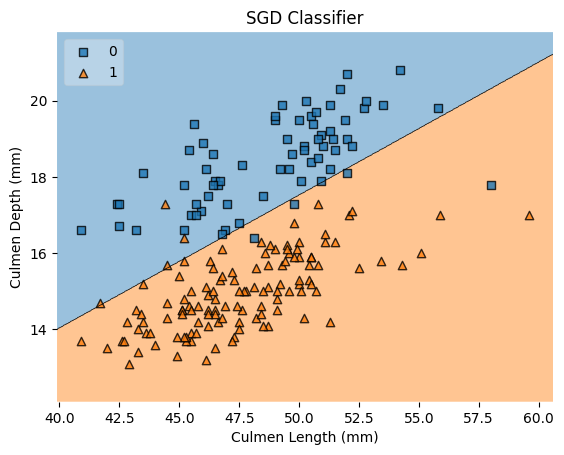

In [ ]:
# Plotting the graph
import matplotlib.pyplot as plt
plot_decision_regions(X.values, y, clf=model, legend=2)

plt.show()